C:\Users\young\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\young\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\young\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\young\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\young\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
 

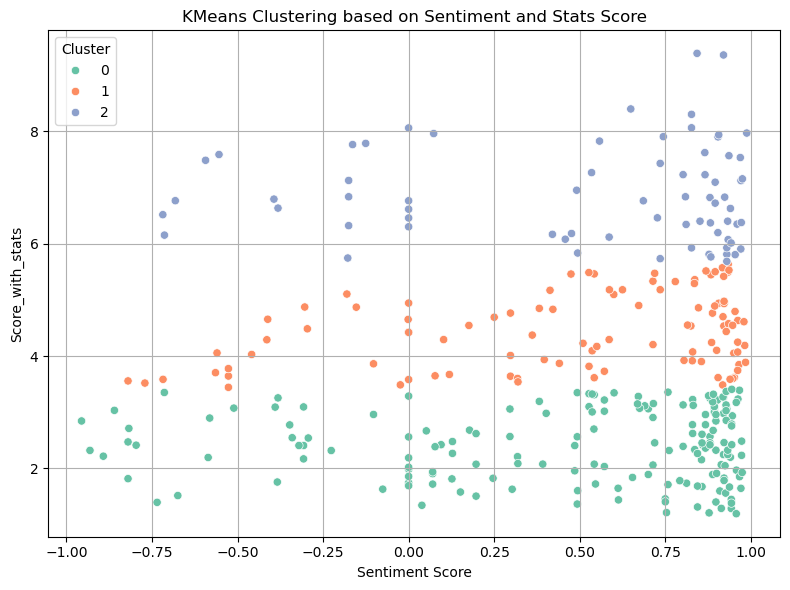

C:\Users\young\AppData\Local\Temp\ipykernel_20064\3812897627.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment Group', y='Score_with_stats', palette='Set3')


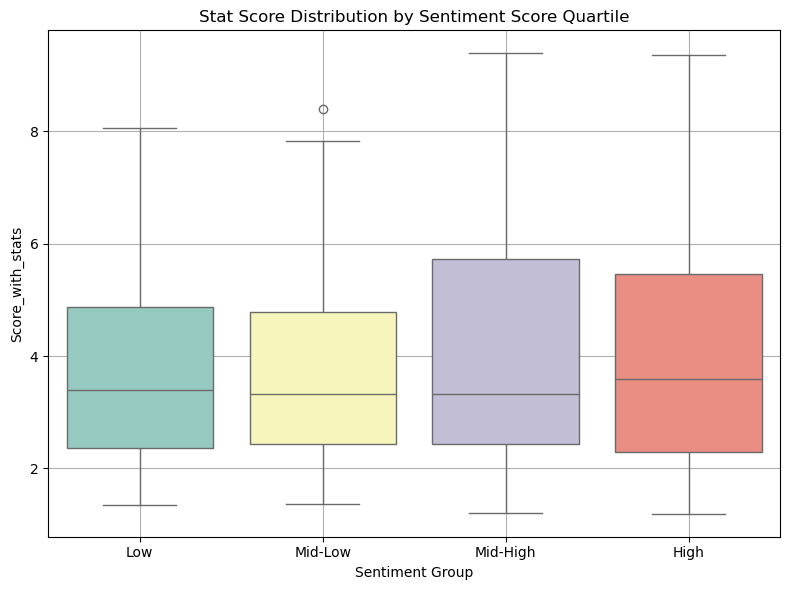

📊 상위 10% 평균 스탯 점수: 4.08
📉 하위 10% 평균 스탯 점수: 3.789
📐 평균 차이: 0.291


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv("04_d_m_senscore_and_statscore.csv")

df = df[['Sentiment Score', 'Score_with_stats']].dropna()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['Sentiment Score', 'Score_with_stats']])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sentiment Score', y='Score_with_stats', hue='Cluster', palette='Set2')
plt.title('KMeans Clustering based on Sentiment and Stats Score')
plt.grid(True)
plt.tight_layout()
plt.show()

df['Sentiment Group'] = pd.qcut(df['Sentiment Score'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sentiment Group', y='Score_with_stats', palette='Set3')
plt.title('Stat Score Distribution by Sentiment Score Quartile')
plt.grid(True)
plt.tight_layout()
plt.show()

top10 = df.nlargest(int(len(df) * 0.1), 'Sentiment Score')
bottom10 = df.nsmallest(int(len(df) * 0.1), 'Sentiment Score')

top10_mean = round(top10['Score_with_stats'].mean(), 3)
bottom10_mean = round(bottom10['Score_with_stats'].mean(), 3)
difference = round(top10_mean - bottom10_mean, 3)

print("📊 상위 10% 평균 스탯 점수:", top10_mean)
print("📉 하위 10% 평균 스탯 점수:", bottom10_mean)
print("📐 평균 차이:", difference)
